# DATA ANALYSIS 


In [4]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pylab import rcParams
from prophet import Prophet

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Load the data 
main_df = pd.read_csv("../final_data/final_df.csv")
crypto_df = pd.read_csv("../final_data/crypto_series.csv")
currency_df = pd.read_csv("../final_data/currency_series.csv")
commodity_df = pd.read_csv("../final_data/commodity_series.csv")
rates_df = pd.read_csv("../final_data/rates_series.csv")

In [6]:
crypto_df

,date,btc_p,ltc_p,eth_p,xrp_p,doge_p
0,04/01/2016,426.57000,3.49300,0.9600,0.007418,0.000224
1,06/01/2016,431.32000,3.47900,0.9426,0.005809,0.000234
2,07/01/2016,429.99000,3.44000,0.9500,0.006787,0.000302
3,08/01/2016,457.88354,3.58399,0.9400,0.005906,0.000223
4,11/01/2016,449.13000,3.52817,1.0000,0.008102,0.000221
...,...,...,...,...,...,...
1282,20/12/2021,46688.40000,153.22000,3924.3700,0.879828,0.879828
1283,21/12/2021,46898.10000,152.75000,3941.8200,0.947646,0.947646
1284,22/12/2021,48925.90000,154.70000,4018.2000,0.954699,0.954699
1285,23/12/2021,48624.90000,155.41000,3980.4400,0.993285,0.993285


In [7]:
# Set datetime index in all DFs:

main_df = main_df.set_index('date')
crypto_df = crypto_df.set_index('date')
currency_df = currency_df.set_index('date')
commodity_df = commodity_df.set_index('date')
rates_df = rates_df.set_index('date')

In [8]:
# # Defining which columns belong to every group of features
# crypto_col = ['btc_p', 'ltc_p', 'eth_p', 'xrp_p', 'doge_p']
# currency_col = ['usd_gbp', 'usd_gbp_ %','usd_eur', 'usd_eur_%', 'usd_yuan', 'usd_yuan_%', 'usd_yen','usd_yen_ %'] 
# comm_col = ['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p','steel_price']
# rates_col = ['LIBOR', 'eonia', 'fed_rate']

# # Separarting DF for further analysis
# crypto = main_df[crypto_col]
# currency = main_df[currency_col]
# commodity = main_df[comm_col]
# rates = main_df[rates_col]

In [9]:
rates_df

,LIBOR,eonia,fed_rate
date,,,
04/01/2016,0.37910,-0.335,0.37
06/01/2016,0.38550,-0.333,0.37
07/01/2016,0.40610,-0.321,0.41
08/01/2016,0.41440,-0.330,0.40
11/01/2016,0.43456,-0.348,0.41
...,...,...,...
20/12/2021,0.07250,-0.491,0.08
21/12/2021,0.07288,-0.486,0.08
22/12/2021,0.07050,-0.489,0.08


The crypto DF does not need transformation for now as will be the target.


In [10]:
# CURRENCY PRICES IN $ Vs CRYPTO PRICES 
curr_btc = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','btc_p']]
curr_ltc = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','ltc_p']]
curr_eth = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','eth_p']]
curr_xrp = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','xrp_p']]
curr_doge= main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','doge_p']]

# CURRENCY PRICE VARIATION Vs CRYPTO PRICES 
curr_var_btc = main_df[['usd_gbp_ %','usd_eur_%','usd_yuan_%','usd_yen_ %','btc_p']]
curr_var_ltc = main_df[['usd_gbp_ %','usd_eur_%','usd_yuan_%','usd_yen_ %','ltc_p']]
curr_var_eth = main_df[['usd_gbp_ %','usd_eur_%','usd_yuan_%','usd_yen_ %','eth_p']]
curr_var_xrp = main_df[['usd_gbp_ %','usd_eur_%','usd_yuan_%','usd_yen_ %','xrp_p']]
curr_var_doge= main_df[['usd_gbp_ %','usd_eur_%','usd_yuan_%','usd_yen_ %','doge_p']]

# COMMODITY PRICES Vs CRYPTO PRICES 
comm_btc = main_df[['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p', 'steel_price', 'btc_p']]
comm_ltc = main_df[['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p', 'steel_price', 'ltc_p']]
comm_eth = main_df[['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p', 'steel_price', 'eth_p']]
comm_xrp = main_df[['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p', 'steel_price', 'xrp_p']]
comm_doge= main_df[['wti_oil_pprice', 'brent_oil_p', 'gold_p', 'silver_p', 'steel_price', 'doge_p']]

# INTEREST RATES Vs CRYPTO PRICES 
rates_btc = main_df[['LIBOR', 'eonia', 'fed_rate', 'btc_p']]
rates_ltc = main_df[['LIBOR', 'eonia', 'fed_rate', 'ltc_p']]
rates_eth = main_df[['LIBOR', 'eonia', 'fed_rate', 'eth_p']]
rates_xrp = main_df[['LIBOR', 'eonia', 'fed_rate', 'xrp_p']]
rates_doge= main_df[['LIBOR', 'eonia', 'fed_rate', 'doge_p']]


# DESCRIPTIVE ANALYSIS 

CURRENCY PRICES (in $) Vs CRYPTO PRICES

In [19]:
curr_btc = main_df[['usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','btc_p']]





# curr_ltc = main_df[['date','usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','ltc_p']]
# curr_eth = main_df[['date','usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','eth_p']]
# curr_xrp = main_df[['date','usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','xrp_p']]
# curr_doge= main_df[['date','usd_gbp', 'usd_eur', 'usd_yuan',  'usd_yen','doge_p']]


In [20]:
# curr_btc.plot()
# # All the other vbale appear flat because they are in an extremely smalelr scale 

I have to scale and normalize 

In [21]:
# #Check multicolinearity:
# sns.pairplot(curr_btc)
# plt.show()

# correlations_matrix = curr_btc.corr()
# correlations_matrix

# sns.heatmap(correlations_matrix, annot=True)
# plt.show()

In [22]:
#######################################
# BTC Vs USD-GBP correlation : -0.36
# BTC Vs USD-EUR correlation : -0.45
# BTC Vs USD-YUAN correlation : -0.46
# BTC Vs USD-YEN correlation : 0.013
# The Yen price has very little correlation, with bitcoin price. I am going to leave it out of the analysis.
#######################################

In [23]:
# Drop "usd_yen" :
curr_btc = curr_btc.drop("usd_yen",axis=1)

There are some relevant relations between the target (btc_p) and the features, although there migth be exponential correlation

In [24]:
# # Let's plot the features to visually inspect them.

# # All currencies prices Vs BTC price 

#     # Scatter plots 
# plt.scatter(x=curr_btc['usd_gbp'], y=curr_btc['btc_p'])
# plt.title("GBP/BTC")
# plt.show()
# plt.scatter(x=curr_btc['usd_eur'], y=curr_btc['btc_p'])
# plt.title("EUR/BTC")
# plt.show()
# plt.scatter(x=curr_btc['usd_yuan'], y=curr_btc['btc_p'])
# plt.title("YUAN/BTC")
# plt.show()

#     # All values distributions 
# sns.displot(curr_btc['usd_gbp'])
# plt.title("GBP")
# plt.show()
# sns.displot(curr_btc['usd_eur'])
# plt.title("EUR")
# plt.show()
# sns.displot(curr_btc['usd_yuan'])
# plt.title("YUAN")
# plt.show()
# sns.displot(curr_btc['btc_p'])
# plt.title("BTC")
# plt.show()
    
#     # Boxplots (Individually plotted)
# curr_btc[['usd_gbp']].boxplot()
# plt.title("USD/GBP")
# plt.show()
# curr_btc[['usd_eur']].boxplot()
# plt.title("USD/EUR")
# plt.show()
# curr_btc[['usd_yuan']].boxplot()
# plt.title("USD/YUAN")
# plt.show()
# curr_btc[['btc_p']].boxplot()
# plt.title("BTC")
# plt.show()


In [25]:
# # X and Y split 
# y = curr_btc['btc_p']
# X = curr_btc.drop(['btc_p'], axis=1)
# lm = linear_model.LinearRegression()
# lm.fit(X,y)
# print("R2-score is:",lm.score(X,y))
# y_pred=lm.predict(X)
# print("MSE is :",mean_squared_error(y_pred,y))
# R2-score is: 0.25169277516874844
# MSE is : 190782489.03306693

# curr_btc_gbp_s = curr_btc ['usd_gbp']

In [26]:
# X and Y split 
X_curr = curr_btc.drop(['btc_p'], axis=1)
y_curr = curr_btc[['btc_p']]

# As timeseries, the normal train test split doesnt work well as randomnly picks rows, and scrambles the data
# Train test just for gbp Vs btc 

# X_curr_train, X_curr_test = X_curr[:-10], X_curr[-10:]
# y_curr_train, y_curr_test = y_curr[:-10], y_curr[-10:]

# X_train, X_test = curr_btc[:-10], curr_btc[-10:]
# y_train, y_test = curr_btc[:-10], curr_btc[-10:]

#TRAIN TEST SPLIT 
X_curr_train, X_curr_test, y_curr_train, y_curr_test = train_test_split(
    X_curr, y_curr,
    test_size=0.2,
    random_state=42
)

There are hints of inverse function ( y = |1/x| ) type of regression. We will see which model predicts better.

They are all of them quite Normally distributed, I will keep outliers as they are relevant (prices)

I am applying MinMaxScaler due to: 
Preserves the shape of the original distribution. 
It doesn’t meaningfully change the information embedded in the original data.
Doesn’t reduce the importance of outliers.
Default range for the feature returned by MinMaxScaler is 0 to 1.
Also the variables are quite Normally distibuted already



In [27]:
# Standardize
scaler = MinMaxScaler()
X_curr_train_sc = scaler.fit_transform(X_curr_train)
X_curr_test_sc  = scaler.transform(X_curr_test)

# Convert to DF
X_curr_tr = pd.DataFrame(X_curr_train_sc, columns=X_curr_train.columns)
X_curr_te = pd.DataFrame(X_curr_test_sc, columns=X_curr_test.columns)

Model selection: Which model will predict more accurately? 
Most likely linear models will not work well as the data sugest Logaritmic regression line 
    I am going to try:
    
        Linear Regression 
        
        KNN Regression Model
        
         
        

In [28]:
#Linear Regression

lm = linear_model.LinearRegression()
lm.fit(X_curr_tr,y_curr_train)
print(lm.intercept_) #b(0)
print(lm.coef_) #b(1) coefficients is an array because we can have more than one dimension for our gradient
y_pred = lm.predict(X_curr_te)
print(y_pred)
print(y_curr_test)
# Very bad predictions 

[29694.64027164]
[[  7297.98495096 -21524.73223018 -20667.86216061]]
[[20795.34227885]
 [11189.92263177]
 [ -517.28361549]
 [19636.86424362]
 [19306.60312668]
 [ -696.62564616]
 [ 1961.73175974]
 [27777.14498119]
 [ 6356.26668995]
 [17453.41238522]
 [13211.21915607]
 [21099.23587428]
 [13389.32587747]
 [13502.31662408]
 [ 3674.94765204]
 [20623.51525372]
 [ 7729.46788448]
 [28327.58708453]
 [ 3492.16162201]
 [21769.51953137]
 [13822.01397147]
 [16926.04661994]
 [ 6272.06443936]
 [22443.81568953]
 [14770.50043617]
 [10249.22061581]
 [23473.26959813]
 [ 2590.82027075]
 [20963.85918455]
 [11385.46163313]
 [11990.42609668]
 [20667.81711656]
 [ 9913.23117474]
 [11272.57799622]
 [23361.81719419]
 [ 5852.23005835]
 [15421.6311486 ]
 [21964.18384682]
 [14277.76332568]
 [ 1850.5918095 ]
 [19547.38065335]
 [24148.91607546]
 [11303.40302313]
 [11390.59528597]
 [14746.31387738]
 [18081.14611454]
 [ 6815.13145125]
 [13898.4907849 ]
 [11169.46262387]
 [19089.97412365]
 [ 1384.77792145]
 [ 9487.94912

In [29]:
MSE_lin = np.square(np.subtract(y_curr_test,y_pred)).mean() 
RMSE_lin = math.sqrt(MSE_lin)
print("Root Mean Square Error:\n")
print(RMSE_lin)

Root Mean Square Error:

15213.829064825311


In [ ]:
# Plot the data to visually inspect 
plt.scatter(X_curr_train['usd_gbp'], y_curr_train)
plt.plot(X_curr_test['usd_gbp'], y_curr_test, color='red')
plt.show()
# NO linear dependency  

In [31]:
# predictions_test = lm.predict(X_curr_tr)
# r2_score(y_curr_train, predictions_test)

# # Not following a linear finction on the regression
# # OUTPUT r2_score = 0.24764100302924907

In [32]:
# # KNN 
# # 4 neighbors

# KNN = KNeighborsRegressor(n_neighbors=4)
# KNN.fit(X_curr_train, y_curr_train)

# score = KNN.score(X_curr_test, y_curr_test)
# score
# # -33.28562145700869
# # The result confirms it doesn't really make sense as is a timeseries 

In [33]:
#######################################
# The data's regression line doesn't follow a linear function, I need to find a regression method that 
#  follows y = 1/X regression line 
# Or create a collumn woth the inverse functions of the columns and do a linear regression 
# 
# 
#######################################

In [34]:
curr_btc

,usd_gbp,usd_eur,usd_yuan,btc_p
date,,,,
04/01/2016,0.6794,0.9232,6.5354,426.57000
06/01/2016,0.6836,0.9275,6.5566,431.32000
07/01/2016,0.6841,0.9144,6.5929,429.99000
08/01/2016,0.6887,0.9148,6.5965,457.88354
11/01/2016,0.6876,0.9208,6.5695,449.13000
...,...,...,...,...
20/12/2021,0.7571,0.8866,6.3756,46688.40000
21/12/2021,0.7535,0.8860,6.3716,46898.10000
22/12/2021,0.7488,0.8828,6.3695,48925.90000


Create a 1/x DF PRIVED TO BE IRRELEVANT

In [35]:
# # Separate columns from target to do the inverse 
# curr_btc_inv_1 = curr_btc.drop('btc_p', axis=1)

In [36]:
# def inv(x):
#     return 1/x
# curr_btc_inv_df = curr_btc_inv_1.apply(inv)

In [37]:
# # We merge again after doing the 1/x 
# curr_btc_i = pd.merge(curr_btc_inv_df,curr_btc.btc_p,how="inner",on='date')

In [38]:
# # Lets try to find now Linear correlation

# #Check multicolinearity:
# sns.pairplot(curr_btc_i)
# plt.show()

# correlations_matrix = curr_btc_i.corr()
# correlations_matrix

# sns.heatmap(correlations_matrix, annot=True)
# plt.show()

Still no different collinearity 

In [39]:
# # X and Y split 
# X_curr_i = curr_btc_i.drop(['btc_p'], axis=1)
# y_curr_i = curr_btc_i[['btc_p']]

# # As timeseries, the normal train test split doesnt work well as randomnly picks rows, and scrambles the data
# # Train test just for gbp Vs btc 

# X_curr_train_i, X_curr_test_i = X_curr_i[:-10], X_curr_i[-10:]
# y_curr_train_i, y_curr_test_i = y_curr_i[:-10], y_curr_i[-10:]

# # Standardize
# scaler = MinMaxScaler()
# X_curr_train_sc_i = scaler.fit_transform(X_curr_train_i)
# X_curr_test_sc_i  = scaler.transform(X_curr_test_i)

# # Convert to DF
# X_curr_tr_i = pd.DataFrame(X_curr_train_sc_i, columns=X_curr_train_i.columns)
# X_curr_te_i = pd.DataFrame(X_curr_test_sc_i, columns=X_curr_test_i.columns)

# #Linear Regression with inverse DF

# lm = linear_model.LinearRegression()
# lm.fit(X_curr_tr_i,y_curr_train_i)
# print(lm.intercept_) #b(0)
# print(lm.coef_) #b(1) coefficients is an array because we can have more than one dimension for our gradient
# y_pred_i = lm.predict(X_curr_te_i)
# print(y_pred_i)
# print(y_curr_test_i)
# # Very bad predictions 

In [40]:
# predictions_test_i = lm.predict(X_curr_tr_i)
# r2_score(y_curr_train_i, predictions_test)

# # Not following a linear finction on the regression
# # OUTPUT r2_score = 0.24764100302924907

In [11]:
curr_btc

,usd_gbp,usd_eur,usd_yuan,usd_yen,btc_p
date,,,,,
04/01/2016,0.6794,0.9232,6.5354,119.44,426.57000
06/01/2016,0.6836,0.9275,6.5566,118.47,431.32000
07/01/2016,0.6841,0.9144,6.5929,117.68,429.99000
08/01/2016,0.6887,0.9148,6.5965,117.45,457.88354
11/01/2016,0.6876,0.9208,6.5695,117.77,449.13000
...,...,...,...,...,...
20/12/2021,0.7571,0.8866,6.3756,113.58,46688.40000
21/12/2021,0.7535,0.8860,6.3716,114.08,46898.10000
22/12/2021,0.7488,0.8828,6.3695,114.11,48925.90000


# TIME SERIES ANALYSIS 

In [28]:
# Standardize
scaler = MinMaxScaler()
curr_btc_sc = scaler.fit_transform(curr_btc)

# Convert to DF
curr_btc_s = pd.DataFrame(curr_btc_sc, columns=curr_btc.columns)

In [30]:
# # Check features for Seasonality with the complete DF curr_btc:

#period=214 shows the 214 days of trade as avreage on records 
rcParams['figure.figsize'] = 18, 8

res = sm.tsa.seasonal_decompose(curr_btc.usd_gbp, period=214,model='additive')  
print('USD/GBP  mean:' ,curr_btc.usd_gbp.mean())
fig = res.plot()

res = sm.tsa.seasonal_decompose(curr_btc.usd_eur, period=214,model='additive')
print('USD/EUR  mean:' ,curr_btc.usd_eur.mean())
fig = res.plot()

res = sm.tsa.seasonal_decompose(curr_btc.usd_eur, period=214,model='additive') 
print('USD/YUAN mean:' ,curr_btc.usd_eur.mean())
fig = res.plot()

res = sm.tsa.seasonal_decompose(curr_btc.btc_p, period=214,model='additive') 
print('BTC      mean:' ,curr_btc.btc_p.mean())
fig = res.plot()



USD/GBP  mean: 0.7600042735042727
USD/EUR  mean: 0.876039937839938


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9479eda820> (for post_execute):


KeyboardInterrupt: 

We can cconclude that nor the currencies or BTC follow any significant seasonality.

The Seasonal Descomposer has found patterns lets say woth a 10% var range,  but then the errors where 25% range

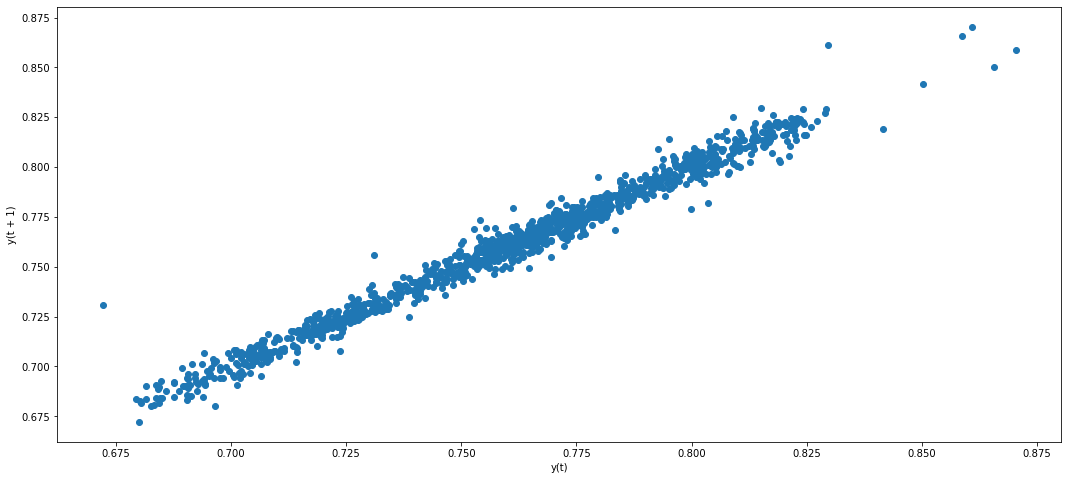

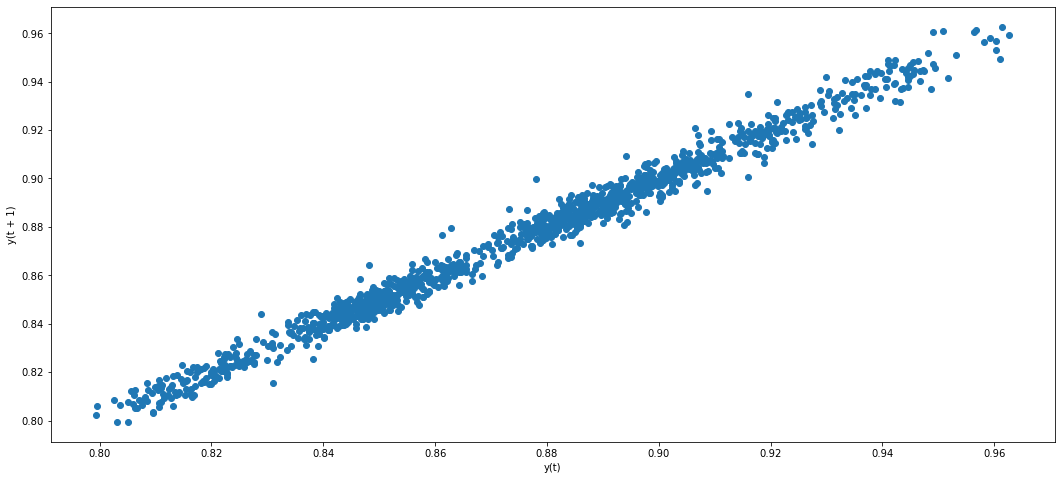

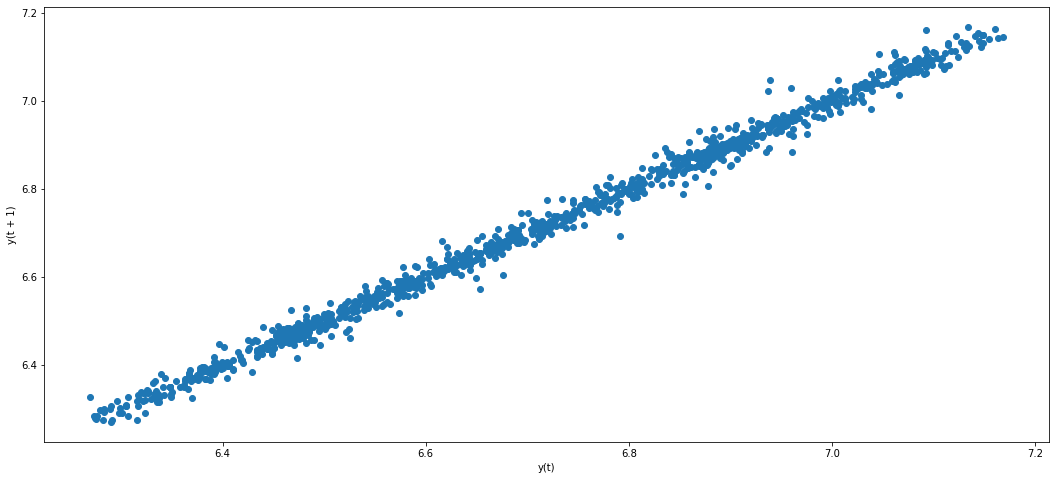

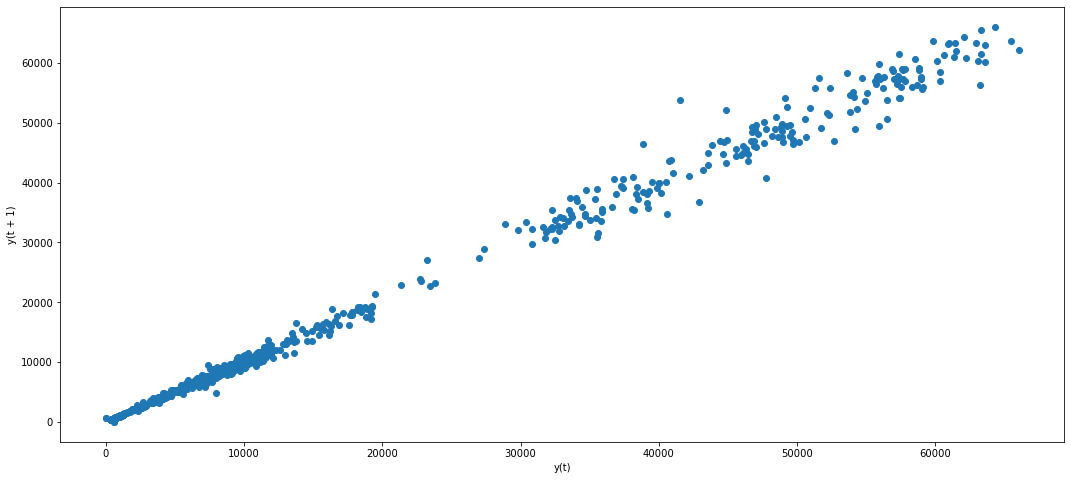

In [16]:
lag_plot(curr_btc.usd_gbp) 
plt.show()
lag_plot(curr_btc.usd_eur)
plt.show()
lag_plot(curr_btc.usd_yuan) 
plt.show()
lag_plot(curr_btc.btc_p) 
plt.show()

In [44]:
#########################################################################################
# STRONG AUTOCORRELATION (The value for period 't' is strongly dependent from value (t-1))
# There is a break n the plot on BTC due t big fluctuations (EMOTION RESPONSE ? )
#########################################################################################

In [32]:
curr_btc_s

,usd_gbp,usd_eur,usd_yuan,usd_yen,btc_p
0,0.036813,0.758114,0.295983,0.923477,0.006460
1,0.057993,0.784446,0.319573,0.877657,0.006532
2,0.060514,0.704225,0.359964,0.840340,0.006511
3,0.083712,0.706675,0.363970,0.829476,0.006934
4,0.078164,0.743417,0.333927,0.844591,0.006801
...,...,...,...,...,...
1282,0.428643,0.533987,0.118171,0.646670,0.707016
1283,0.410489,0.530312,0.113720,0.670288,0.710192
1284,0.386788,0.510716,0.111383,0.671705,0.740900
1285,0.371155,0.509492,0.111494,0.683987,0.736341


In [33]:
curr_btc_s.usd_gbp

0       0.036813
1       0.057993
2       0.060514
3       0.083712
4       0.078164
          ...   
1282    0.428643
1283    0.410489
1284    0.386788
1285    0.371155
1286    0.348462
Name: usd_gbp, Length: 1287, dtype: float64

In [47]:
# scaler = MinMaxScaler()
# train_scal = scaler.fit_transform(curr_btc)
# # test_scal  = scaler.transform(test)

In [34]:
# # Train test per currency, and BTC sperately (we are predicting each one separately)

#  USD / GBP 
gbp_train, gbp_test = curr_btc_s["usd_gbp"][:-50], curr_btc_s["usd_gbp"][-50:]


# # Convert to DF
# gbp_train = pd.DataFrame(gbp_train)
# gbp_test = pd.DataFrame(gbp_test)



In [35]:
gbp_train

0       0.036813
1       0.057993
2       0.060514
3       0.083712
4       0.078164
          ...   
1232    0.310640
1233    0.286435
1234    0.298033
1235    0.291478
1236    0.335855
Name: usd_gbp, Length: 1237, dtype: float64

In [96]:
# # Standardize
# scaler = MinMaxScaler()
# gbp_train_scal = scaler.fit_transform(gbp_train)
# gbp_test_scal  = scaler.transform(gbp_tes.usd_gbp)

# # Convert to DF

# train_s = pd.DataFrame(gbp_train_scal, columns=gbp_train.usd_gbp)
# test_s = pd.DataFrame(gbp_test_scal, columns=gbp_test.usd_gbp)

In [45]:
gbp_train

0       0.036813
1       0.057993
2       0.060514
3       0.083712
4       0.078164
          ...   
1232    0.310640
1233    0.286435
1234    0.298033
1235    0.291478
1236    0.335855
Name: usd_gbp, Length: 1237, dtype: float64

In [46]:
gbp_test

1237    0.365103
1238    0.353001
1239    0.314675
1240    0.319213
1241    0.321230
1242    0.302068
1243    0.298033
1244    0.277358
1245    0.283913
1246    0.265255
1247    0.258195
1248    0.266263
1249    0.276853
1250    0.272819
1251    0.272819
1252    0.277862
1253    0.267272
1254    0.292990
1255    0.300555
1256    0.313666
1257    0.295008
1258    0.345940
1259    0.328795
1260    0.367625
1261    0.365103
1262    0.350479
1263    0.347453
1264    0.358548
1265    0.374685
1266    0.379223
1267    0.393343
1268    0.390822
1269    0.397882
1270    0.401916
1271    0.407463
1272    0.399395
1273    0.421079
1274    0.417549
1275    0.427131
1276    0.409481
1277    0.425113
1278    0.419062
1279    0.412002
1280    0.395865
1281    0.419062
1282    0.428643
1283    0.410489
1284    0.386788
1285    0.371155
1286    0.348462
Name: usd_gbp, dtype: float64

Root Mean Square Error: 0.07556442820902938
Mean Square Error:      0.005709982810557555
error %:                0.016319174324535383


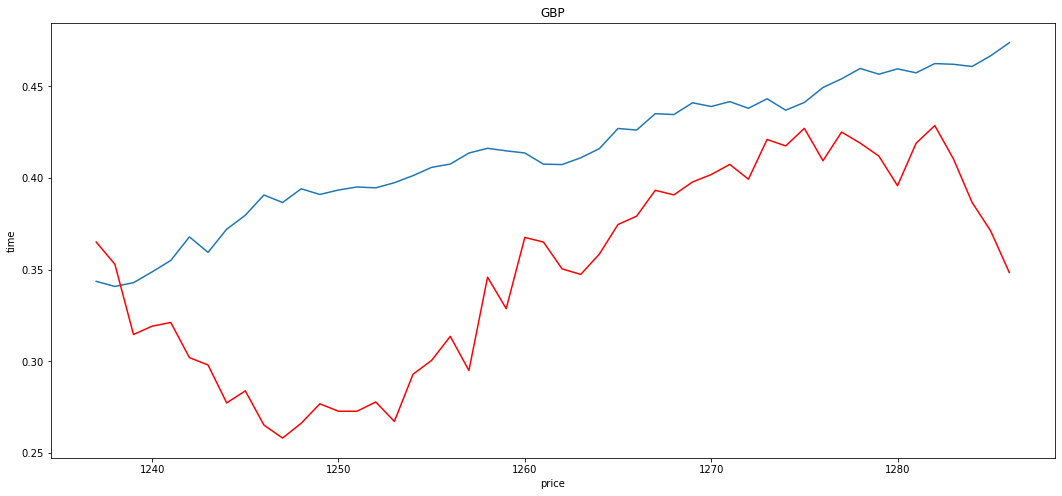

In [37]:
# AUTOREGRESSION MODEL 
# USD / GBP 
ar_model = AutoReg(gbp_train, lags=100) # lag = 1 (1 period)  #We define the model direclty for the train set 
model_fit = ar_model.fit()
ar_predictions_gbp = model_fit.predict(start=len(gbp_train), end=len(gbp_train)+len(gbp_test)-1, dynamic=False)
plt.title("GBP")
plt.xlabel('price')
plt.ylabel('time')
plt.plot(ar_predictions_gbp)
plt.plot(gbp_test, color='red')
# Model accuracy
MSE_AR_gbp = np.square(np.subtract(gbp_test,ar_predictions_gbp)).mean() 
RMSE_AR_gbp = math.sqrt(MSE_AR_gbp)
print("Root Mean Square Error:", RMSE_AR_gbp)
print("Mean Square Error:     ",MSE_AR_gbp)
print("error %:               " , MSE_AR_gbp/np.mean(gbp_test))


In [49]:
y_new_inverse = scaler.inverse_transform(ar_predictions_gbp)

# # Standardize
# scaler = MinMaxScaler()
# curr_btc_sc = scaler.fit_transform(curr_btc)

# # Convert to DF
# curr_btc_s = pd.DataFrame(curr_btc_sc, columns=curr_btc.columns)

ValueError: Expected 2D array, got 1D array instead:
array=[0.34366674 0.34088361 0.34294434 0.34882692 0.35507799 0.36791912
 0.35948308 0.37209487 0.37974021 0.39078774 0.38668775 0.39416701
 0.39106701 0.39349592 0.39515995 0.39467065 0.39747409 0.4013374
 0.40586028 0.40765314 0.41366372 0.4162383  0.41485826 0.41370459
 0.40760233 0.40737971 0.41107703 0.41605685 0.42706719 0.42620699
 0.43513951 0.43466652 0.4410858  0.4390478  0.441711   0.43807583
 0.44326563 0.43703963 0.44125863 0.44941158 0.4541658  0.4597918
 0.45667681 0.45957444 0.45742858 0.4624682  0.46208823 0.4608829
 0.46672712 0.4738658 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
# H0: series is not stationary
# H1: series is stationary
adfuller(curr_btc.usd_gbp)[1] # p-value = 0.02,... We reject H0, the series is stationary (Hard to predict long term)
# Does this mean it should be done first?

0.02008860183627034

In [41]:
curr_btc_s.usd_gbp

0       0.036813
1       0.057993
2       0.060514
3       0.083712
4       0.078164
          ...   
1282    0.428643
1283    0.410489
1284    0.386788
1285    0.371155
1286    0.348462
Name: usd_gbp, Length: 1287, dtype: float64

In [42]:
gbp_train

0       0.036813
1       0.057993
2       0.060514
3       0.083712
4       0.078164
          ...   
1232    0.310640
1233    0.286435
1234    0.298033
1235    0.291478
1236    0.335855
Name: usd_gbp, Length: 1237, dtype: float64

In [44]:
# ARIMA 
model = ARIMA(gbp_train, order=(50, 2, 2)) 
# p = number of lag terms taken into account, periods back
# d = number of times the terms are differenced
# q = moving average window
model_fit = model.fit()
predictions = model_fit.predict(len(curr_btc_s.usd_gbp)-50, len(curr_btc_s.usd_gbp)-1)
# We convert to DF and reset index to compare with test values 
predict_gbp = pd.DataFrame(predictions)
predict_gbp = predict_gbp.reset_index(drop=True)
predict_gbp = predict_gbp.rename({'predicted_mean':"predicted"}, axis=1)
# make a DF with predictions Vs actual (test) values 
check_gbp = curr_btc_s[['usd_gbp']].tail(50)
check_gbp = check_gbp.reset_index(drop=True)
compare_gbp_pred = pd.concat([check_gbp,predict_gbp],axis=1,join="inner",ignore_index=False,sort=False, copy=False) 
compare_gbp_pred['error'] = compare_gbp_pred['usd_gbp'] - compare_gbp_pred['predicted']
# Model accuracy
MSE_ARIMA_gbp = np.square(np.subtract(check_gbp,predict_gbp)).mean() 
RMSE_ARIMA_gbp = math.sqrt(MSE_ARIMA_gbp)
print("Root Mean Square Error: ",RMSE_ARIMA_gbp)
print("Mean Square Error:      ",MSE_ARIMA_gbp)
print("error %:                ",MSE_ARIMA_gbp/np.mean(check_gbp))

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Square Error:  0.04415051976033304
Mean Square Error:       usd_gbp    0.001949
dtype: float64
error %:                 usd_gbp    0.005571
dtype: float64


/var/folders/hq/x_513gjd2qsd86w2rwvd665m0000gn/T/ipykernel_730/2417942549.py:18: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  MSE_ARIMA_gbp = np.square(np.subtract(check_gbp,predict_gbp)).mean()


In [385]:
compare_gbp_pred

,usd_gbp,predicted,error
0,0.7445,0.739607,0.004893
1,0.7421,0.738952,0.003148
2,0.7345,0.738588,-0.004088
3,0.7354,0.738120,-0.002720
4,0.7358,0.738556,-0.002756
5,0.7320,0.739386,-0.007386
6,0.7312,0.738177,-0.006977
7,0.7271,0.737753,-0.010653
8,0.7284,0.737521,-0.009121
9,0.7247,0.737799,-0.013099


Root Mean Square Error:  0.011666837777515855
Mean Square Error:       usd_gbp    0.000136
dtype: float64
error %:                 usd_gbp    0.000184
dtype: float64


/var/folders/hq/x_513gjd2qsd86w2rwvd665m0000gn/T/ipykernel_28830/1591416696.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  MSE_ARIMA_gbp = np.square(np.subtract(check_gbp,predict_gbp)).mean()


In [ ]:
# #  USD / GBP 
# gbp_train, gbp_test = curr_btc["usd_gbp"][:-50], curr_btc["usd_gbp"][-50:]


# # Convert to DF
# gbp_train = pd.DataFrame(train)
# gbp_test = pd.DataFrame(test)


In [361]:
curr_btc_prophet = curr_btc.reset_index()   # 

In [370]:
curr_btc_prophet

,date,usd_gbp,usd_eur,usd_yuan,btc_p
0,04/01/2016,0.6794,0.9232,6.5354,426.57000
1,06/01/2016,0.6836,0.9275,6.5566,431.32000
2,07/01/2016,0.6841,0.9144,6.5929,429.99000
3,08/01/2016,0.6887,0.9148,6.5965,457.88354
4,11/01/2016,0.6876,0.9208,6.5695,449.13000
...,...,...,...,...,...
1282,20/12/2021,0.7571,0.8866,6.3756,46688.40000
1283,21/12/2021,0.7535,0.8860,6.3716,46898.10000
1284,22/12/2021,0.7488,0.8828,6.3695,48925.90000
1285,23/12/2021,0.7457,0.8826,6.3696,48624.90000


In [379]:
df_pro_gbp

,ds,y
0,04/01/2016,0.6794
1,06/01/2016,0.6836
2,07/01/2016,0.6841
3,08/01/2016,0.6887
4,11/01/2016,0.6876
...,...,...
1282,20/12/2021,0.7571
1283,21/12/2021,0.7535
1284,22/12/2021,0.7488
1285,23/12/2021,0.7457


In [373]:
df_pro_gbp = curr_btc_prophet[['date','usd_gbp']]


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [384]:
# PROPHET



# usd_gbp
df_pro_gbp = curr_btc_prophet[['date','usd_gbp']]
# prepare expected column names
df_pro_gbp.columns = ['ds', 'y']


# define the model
model = Prophet()
# fit the model
model.fit(df_pro_gbp)

# define period to predrict :
future = df_pro_gbp['ds'].tail(10)

# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

16:15:53 - cmdstanpy - INFO - Chain [1] start processing
16:15:53 - cmdstanpy - INFO - Chain [1] done processing


KeyError: 'ds'

In [56]:
!git add .

In [57]:
! git commit -m'all data ready to start analysis'

[main 23a9aab] all data ready to start analysis
 2 files changed, 2317 insertions(+), 11 deletions(-)
 create mode 100644 code/.ipynb_checkpoints/data_analysis-checkpoint.ipynb


In [58]:
! git push

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 450.57 KiB | 7.15 MiB/s, done.
Total 5 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/chrislacarte/crypto_analysis
   2abf036..23a9aab  main -> main
